In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 

In [2]:
data = pd.read_csv('../data/Billboard_Audio_Features.csv')
data = data.drop(columns=['Album ID', 'Artist IDs', 'Query', 'Song', 'Artist(s)'])
data = data.dropna()
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 5745
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5424 non-null   object 
 1   Popularity         5424 non-null   float64
 2   Rank               5424 non-null   float64
 3   Release Date       5424 non-null   object 
 4   Year               5424 non-null   float64
 5   danceability       5424 non-null   float64
 6   energy             5424 non-null   float64
 7   key                5424 non-null   int64  
 8   loudness           5424 non-null   float64
 9   mode               5424 non-null   int64  
 10  speechiness        5424 non-null   float64
 11  acousticness       5424 non-null   float64
 12  instrumentalness   5424 non-null   float64
 13  liveness           5424 non-null   float64
 14  valence            5424 non-null   float64
 15  tempo              5424 non-null   float64
 16  duration_ms        5424 

,ID,Popularity,Rank,Release Date,Year,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Primary Artist ID,Genres,Top Genre
0,5HQ6AUDMbMuwktvcNPuV1y,36.0,1.0,1991-01-01,1991.0,0.521,0.349,1,-13.452,1,...,0.06480,0.000013,0.0550,0.273,131.189,398027,4,3Z02hBLubJxuFJfhacLSDc,"album rock, canadian pop, canadian singer-song...",rock
1,0mUyMawtxj1CJ76kn9gIZK,75.0,1.0,2005-02-22,2006.0,0.599,0.785,3,-4.013,1,...,0.44800,0.003360,0.1510,0.520,140.046,233640,4,7xTcuBOIAAIGDOSvwYFPzk,"canadian pop, neo mellow, pop rock",pop
2,2goLsvvODILDzeeiT4dAoR,76.0,1.0,1998-01-01,1999.0,0.652,0.917,6,-6.720,1,...,0.00820,0.000000,0.0509,0.459,132.975,239027,4,72OaDtakiy6yFqkt4TsiFt,"dance pop, hollywood, new wave pop, pop, pop rock",pop
3,0kPeymTUiaidv48eRrMISu,64.0,1.0,2007-01-01,1981.0,0.659,0.541,5,-7.919,1,...,0.01740,0.000000,0.1980,0.560,116.685,224693,4,5PN2aHIvLEM98XIorsPMhE,"new wave pop, soft rock",rock
4,0VjIjW4GlUZAMYd2vXMi3b,94.0,1.0,2020-03-20,2020.0,0.514,0.730,1,-5.934,1,...,0.00146,0.000095,0.0897,0.334,171.005,200040,4,1Xyo4u8uXC1ZmMpatF05PJ,"canadian contemporary r&b, canadian pop, pop",soul/r&b


- acousticness 0.0 - 1.0
- danceability 0.0 - 1.0
- energy 0.0 - 1.0
- instrumentalness 0.0 - 1.0
- liveness 0.0 - 1.0
- speechiness 0.0 - 1.0
-  valence 0.0 - 1.0

- popularity 0 - 100
- time_signature categorical
- tempo bpm
- loadness -60 - 0
- mode major vs minor
- key categorical
- duration_ms any

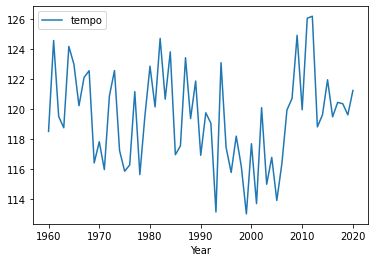

In [61]:
avgs = data.groupby("Year").mean().reset_index()
ax = avgs.plot(x="Year", y="tempo")

avgs['Popularity'] = avgs['Popularity'] / 100

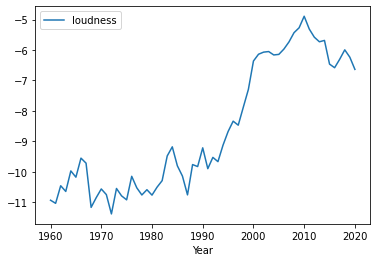

In [64]:
ax = avgs.plot(x="Year", y="loudness")

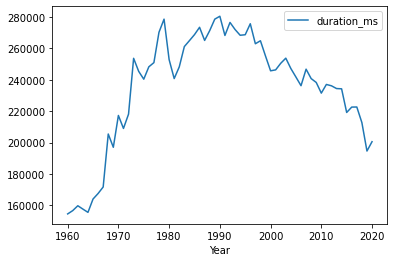

In [65]:
ax = avgs.plot(x="Year", y="duration_ms")

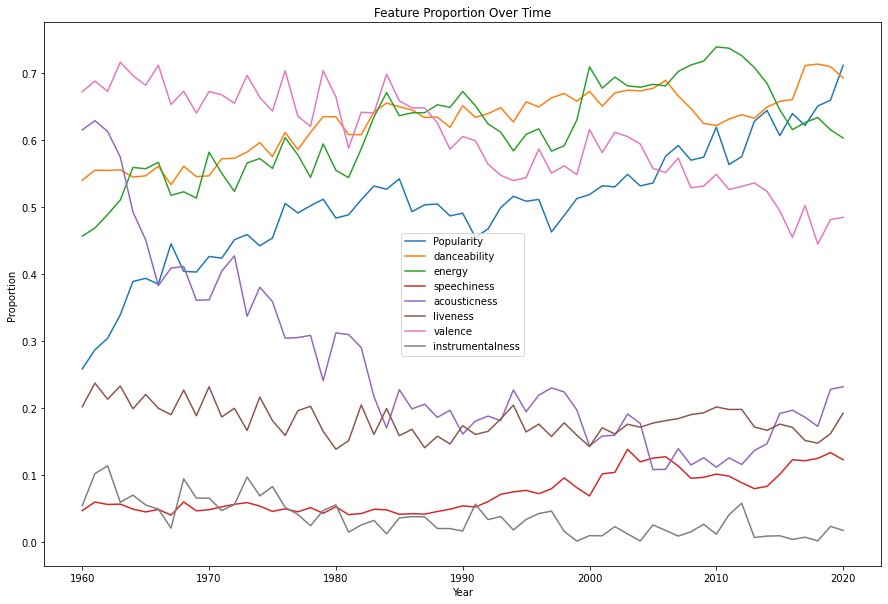

In [73]:
features = ['danceability','energy','speechiness','acousticness','liveness','valence', 'instrumentalness']

ax = avgs.plot(x="Year", y='Popularity', figsize=(15,10))

for feature in features:
    avgs.plot(x="Year", y=feature, ax=ax)

ax.set_ylabel('Proportion')
ax.set_title('Feature Proportion Over Time')

display()

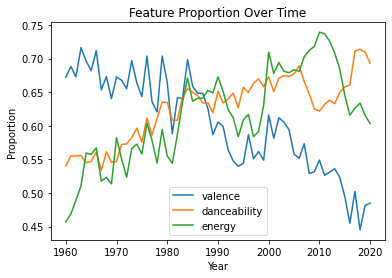

In [74]:
ax = avgs.plot(x="Year", y='valence')
features = ['danceability','energy']

for feature in features:
    avgs.plot(x="Year", y=feature, ax=ax)

ax.set_ylabel('Proportion')
ax.set_title('Feature Proportion Over Time')

display()

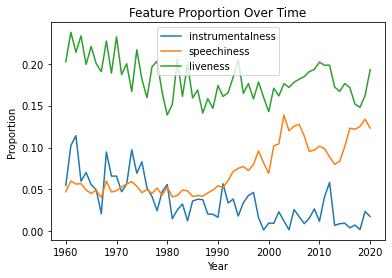

In [75]:
ax = avgs.plot(x="Year", y='instrumentalness')
features = ['speechiness','liveness']

for feature in features:
    avgs.plot(x="Year", y=feature, ax=ax)

ax.set_ylabel('Proportion')
ax.set_title('Feature Proportion Over Time')

display()

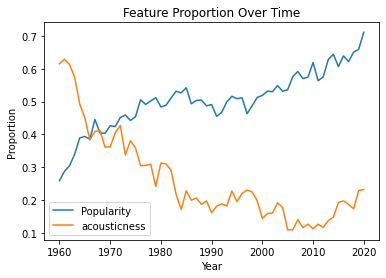

In [76]:
ax = avgs.plot(x="Year", y='Popularity')
features = ['acousticness']

for feature in features:
    avgs.plot(x="Year", y=feature, ax=ax)

ax.set_ylabel('Proportion')
ax.set_title('Feature Proportion Over Time')

display()

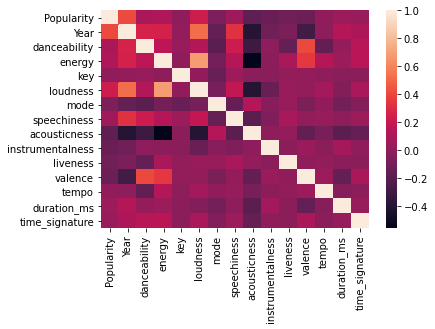

In [3]:
corrs = data.drop(['Rank'], axis=1).corr()
sn.heatmap(corrs)
plt.show()

In [8]:
data.groupby('Top Genre').mean()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Top Genre,,,,,,,,,,,,,
alternative/indie,0.542510,0.741785,4.806452,-6.095174,0.774194,0.043202,0.104419,0.022460,0.173363,0.528571,124.011626,243029.658065,3.954839
country,0.576854,0.596515,5.316750,-9.108643,0.854063,0.043375,0.300146,0.012771,0.176951,0.609237,121.208128,225771.673300,3.966833
disco,0.650005,0.586485,5.401408,-10.640622,0.629108,0.049814,0.293952,0.042251,0.186396,0.690267,118.331310,270524.835681,3.955399
edm,0.671069,0.698082,5.364780,-5.749308,0.591195,0.100986,0.142479,0.027229,0.160148,0.526826,119.645428,220808.044025,3.987421
hip hop/rap,0.734201,0.679448,5.654994,-6.289724,0.573281,0.171719,0.116275,0.013333,0.201890,0.558777,118.736595,239301.067445,3.998703
pop,0.624875,0.646237,5.233302,-7.744183,0.688617,0.057938,0.261869,0.024659,0.175172,0.602963,118.965252,227133.331138,3.971778
rock,0.560775,0.612283,5.083721,-9.424492,0.788372,0.045340,0.295345,0.028425,0.184704,0.607356,122.029451,231397.483721,3.944186
soul/r&b,0.664520,0.573771,5.560084,-8.615846,0.594566,0.079703,0.273966,0.022854,0.172080,0.618500,114.954679,244294.026123,3.936259


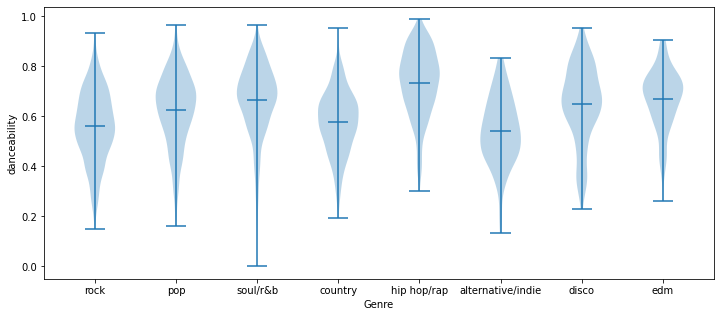

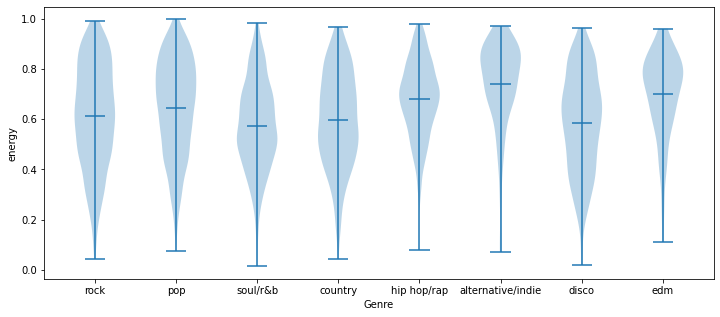

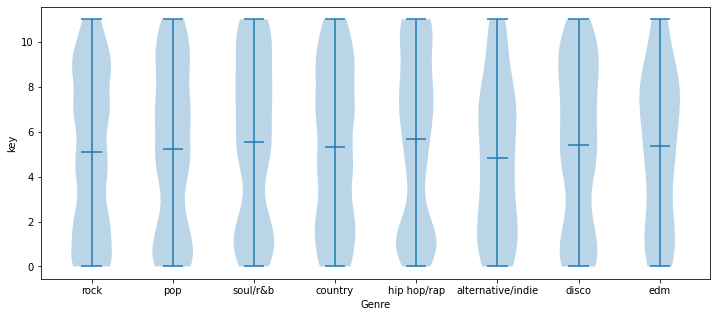

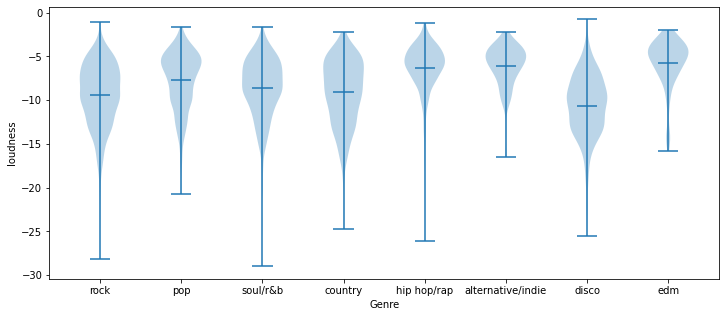

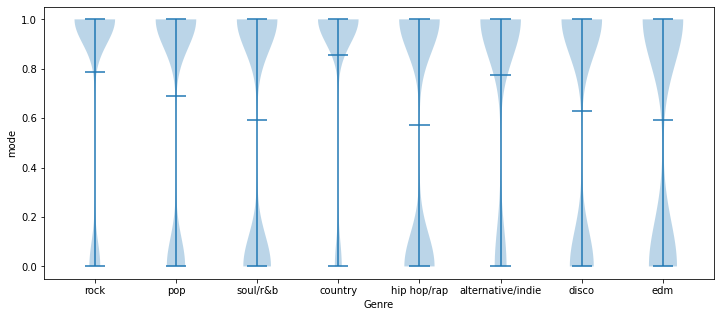

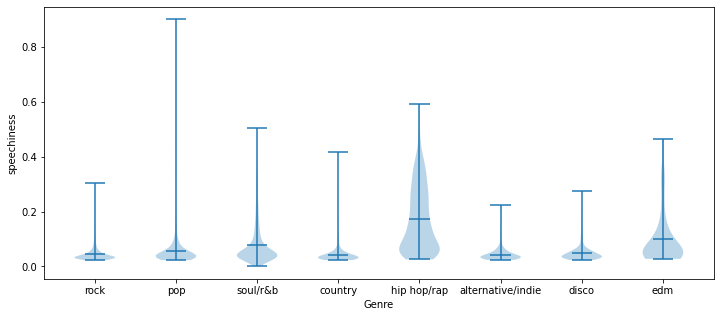

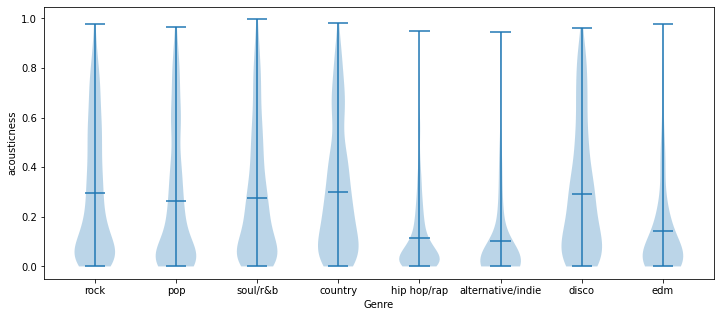

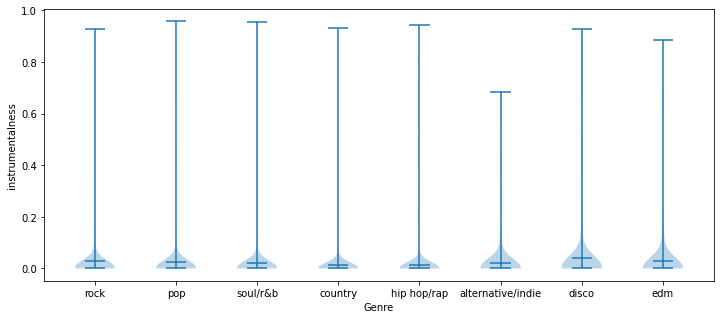

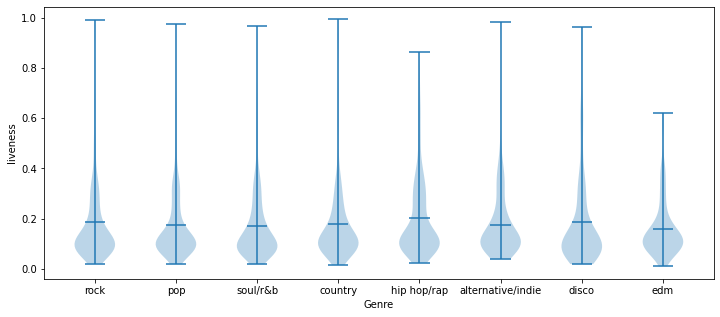

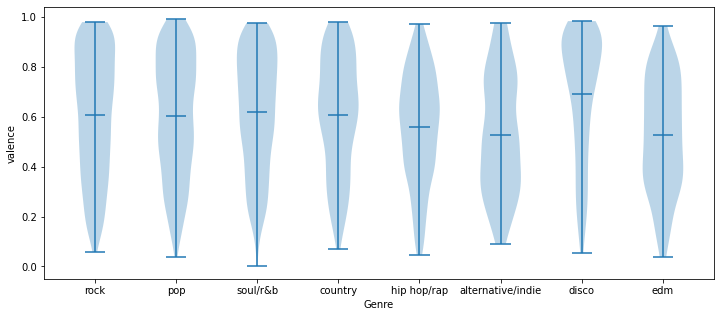

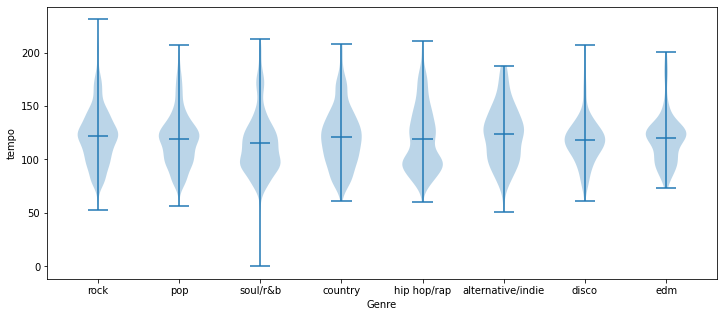

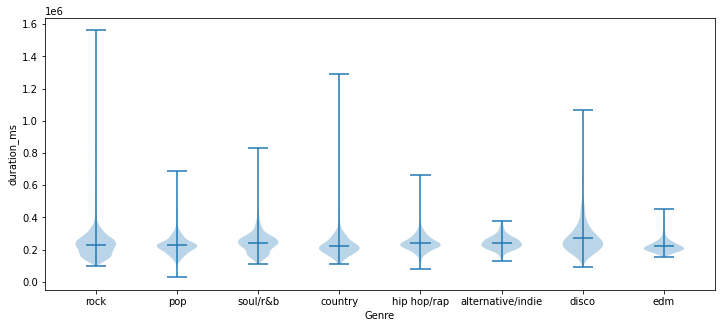

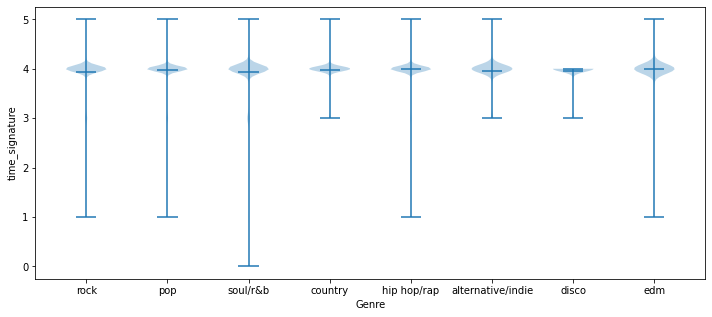

In [21]:
genres = data['Top Genre'].unique()
feature_by_genre = []
fig, ax = plt.subplots(5, 1, sharex='col', sharey='col', figsize=(7.5,10))
plt.subplots_adjust(hspace=0.3)


for feature in ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']:
    feture_by_genre = [data.loc[data["Top Genre"] == genre][feature].values for genre in genres]
    plt.figure(figsize=(12, 5))
    plt.violinplot(feture_by_genre, range(0, len(genres)), showmeans=True)
    plt.xticks(range(0, len(genres)), labels=genres)
    plt.xlabel("Genre")
    plt.ylabel(feature)